In [84]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Dense, Dropout, GaussianNoise
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
x_train = pd.read_pickle("../metadata/x_train.pkl")
y_train = np.ravel(pd.read_pickle("../metadata/y_train.pkl"))
x_test = pd.read_pickle("../metadata/x_test.pkl")

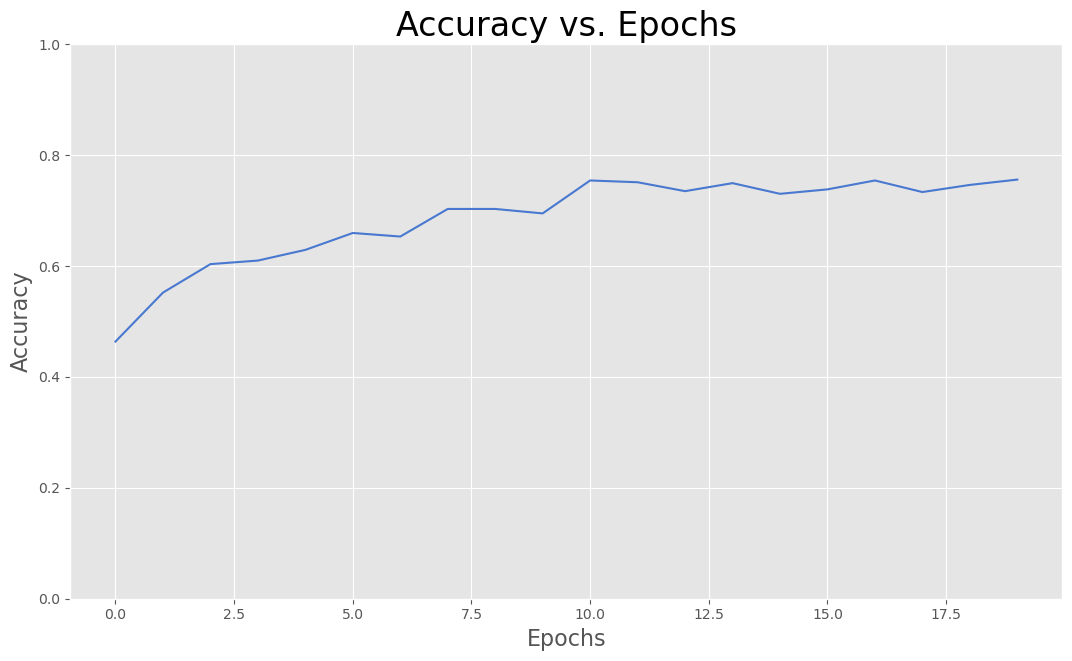

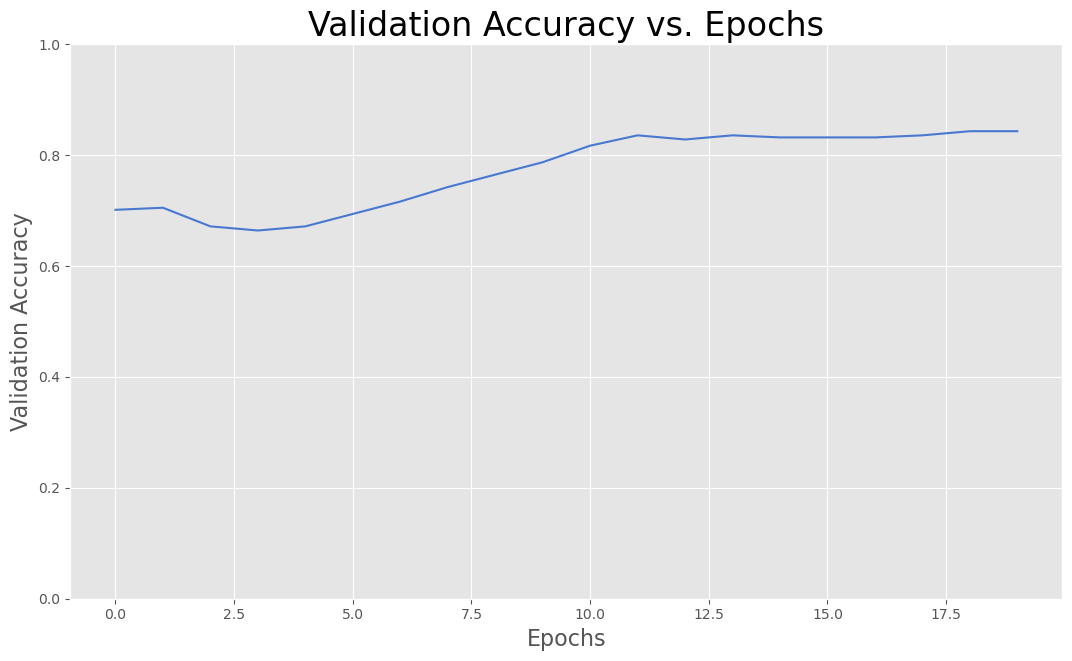

In [87]:
inputs = Input(shape = (x_train.columns.stop,))
x = GaussianNoise(stddev = 1)(inputs)
x = Dense(4)(x)
x = Dense(8)(x)
x = Dense(8, activation = "gelu")(x)
x = Dense(8, activation = "gelu")(x)
x = Dense(8, activation = "gelu")(x)
outputs = Dense(1, activation = "sigmoid")(x)
model = Model(inputs = inputs, outputs = outputs)
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
history = model.fit(
    x = x_train,
    y = y_train,
    epochs = 20,
    verbose = 0,
    validation_split = 0.3
)
history = pd.DataFrame({
    "epochs": history.epoch,
    "loss": history.history["loss"],
    "val_loss": history.history["val_loss"],
    "acc": history.history["accuracy"],
    "val_acc": history.history["val_accuracy"],
})

plt.figure(figsize = (12.8, 7.2))
sns.lineplot(data = history, x = "epochs", y = "acc")
plt.title("Accuracy vs. Epochs", fontsize = 24)
plt.xlabel("Epochs", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.ylim(0,1)
plt.show()
plt.close()

plt.figure(figsize = (12.8, 7.2))
sns.lineplot(data = history, x = "epochs", y = "val_acc")
plt.title("Validation Accuracy vs. Epochs", fontsize = 24)
plt.xlabel("Epochs", fontsize = 16)
plt.ylabel("Validation Accuracy", fontsize = 16)
plt.ylim(0,1)
plt.show()
plt.close()


In [88]:
y_test = (model.predict(x_test, verbose = 0)>0.5).astype(int).flatten()
submission = pd.DataFrame({
    "PassengerId": range(len(x_train) + 1, len(x_train) + len(x_test) + 1, 1),
    "Survived": y_test
})
submission.to_csv("../outputs/submission.csv", index = False)